# Práctica de Aula 4 (PA04)
### Meteorización, intemperización, formas resultantes, geomorfología climática y karst

## Ejercicio 1: Tasa de denudación

**Datos de la cuenca elegida:**  
Cuenca #1  
- Tasa de transporte de sedimentos (TTS) = 103,435,298.45 kg/año  
- Área (A) = 478.71 km²  
- Densidad de rocas (ρ) = 2.69 g/cm³  

---

### Paso 1. Conversión de unidades al Sistema Internacional (SI)

Queremos expresar el resultado en **m/año**, por lo que transformamos las unidades:

- \(1 km^2 = 1 000 000 m^2\)
- \(ρ = 2.69 g/cm^3 = 2.69 × 1000 kg/m^3 = 2690 kg/m^3\)


In [1]:
# Paso 1. Definición de datos y conversión de unidades
TTS = 103_435_298.45      # kg/año
A_km2 = 478.71            # km²
rho_gcm3 = 2.69           # g/cm³

# Conversión al SI
A = A_km2 * 1_000_000     # m²
rho = rho_gcm3 * 1000     # kg/m³

A, rho


(478710000.0, 2690.0)

### Paso 2. Aplicar la fórmula de la tasa de denudación

\[
Td = \frac{TTS / A}{ρ}
\]


In [2]:
# Paso 2. Cálculo de la tasa de denudación
Td = (TTS / A) / rho        # m/año
Td_mm = Td * 1000           # mm/año

print(f"Tasa de denudación anual (Td): {Td:.8f} m/año  ≈ {Td_mm:.4f} mm/año")


Tasa de denudación anual (Td): 0.00008032 m/año  ≈ 0.0803 mm/año


### Paso 3. Denudación acumulada en 30 años
\[
D_{30} = Td \times 30
\]


In [3]:
# Paso 3. Denudación acumulada en 30 años
D_30 = Td_mm * 30
print(f"Denudación acumulada en 30 años: {D_30:.2f} mm")


Denudación acumulada en 30 años: 2.41 mm


### Interpretación

La tasa de denudación anual de la cuenca #1 es de aproximadamente **0.08 mm/año**, 
lo que implica una pérdida total de **2.4 mm en 30 años**. Este valor indica una erosión moderada, 
propia de cuencas con rocas densas y procesos de meteorización lentos.  
Si la **densidad de las rocas (ρ)** fuera menor o si la **tasa de transporte de sedimentos (TTS)** 
aumentara, la tasa de denudación (Td) sería mayor.  
Por otro lado, si el área de la cuenca fuera más grande con el mismo volumen de sedimentos, 
la Td disminuiría porque la erosión media por unidad de superficie sería menor.


## Ejercicio 2: Tamaños de clastos en distintos tramos del río Ocoa

**Par de muestras elegido:**  
- GJRC_02 → Tramo alto (18.59753, -70.67412)  
- LPRO_03 → Tramo bajo (18.44439, -70.49349)

---

### Introducción

Este ejercicio busca analizar la variación del tamaño de los clastos en distintos tramos del río Ocoa, como indicador indirecto del potencial erosivo. A lo largo de un río, los clastos suelen presentar una disminución de tamaño desde la cabecera hacia la desembocadura, producto del transporte y la abrasión. El objetivo es comparar estadísticamente las medidas del eje de **anchura (ancho_en_mm)** entre el tramo alto y el tramo bajo, tanto de forma global como por tipo de roca, para determinar si existen diferencias significativas que reflejen los procesos geomorfológicos del curso fluvial.

---

In [4]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración visual
plt.style.use("seaborn-v0_8-whitegrid")

# Cargar datos
df = pd.read_csv("clastos-longitudes-identificacion.csv")

# Filtrar el par de muestras elegido
pair_codes = ["GJRC_02", "LPRO_03"]
pair_df = df[df["codigo_lugar"].isin(pair_codes)].copy()

# Eliminar valores faltantes o no válidos
pair_df = pair_df.dropna(subset=["ancho_en_mm"])
pair_df = pair_df[pair_df["ancho_en_mm"] > 0]

pair_df.head()


,codigo_lugar,largo_en_mm,ancho_en_mm,espesor_en_mm,tipo_de_muestreo,nombre_roca
0,LPRO_03,34,10,10,rodal con identificación litológica,calizas
1,LPRO_03,34,20,19,rodal con identificación litológica,metamórficas
2,LPRO_03,38,19,19,rodal con identificación litológica,metamórficas
3,LPRO_03,34,18,16,rodal con identificación litológica,margas/lutitas
4,LPRO_03,34,11,8,rodal con identificación litológica,calizas


### Materiales y Métodos

Se utilizó el archivo **clastos-longitudes-identificacion.csv**, que contiene mediciones en milímetros de largo, ancho y espesor de clastos recolectados en diferentes puntos del río Ocoa, clasificados por tipo de roca y ubicación.  
Para el análisis se seleccionaron las muestras **GJRC_02 (tramo alto)** y **LPRO_03 (tramo bajo)**.  
Se emplearon herramientas de análisis estadístico en Python (pandas, matplotlib, scipy) para calcular medias, medianas y realizar pruebas de significancia (t de Student y Wilcoxon).  
Se generaron diagramas de caja para visualizar las diferencias entre ambos tramos, tanto de forma global como por tipo de roca.


In [5]:
# Estadística descriptiva por muestra (global)
summary = pair_df.groupby("codigo_lugar")["ancho_en_mm"].agg(["count", "mean", "median", "std"]).reset_index()
summary


,codigo_lugar,count,mean,median,std
0,GJRC_02,100,33.08,29.0,16.610621
1,LPRO_03,100,22.35,20.0,9.540318


C:\Users\lunab\AppData\Local\Temp\ipykernel_4768\1898237638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pair_df, x="codigo_lugar", y="ancho_en_mm", palette=["#99d8c9","#2ca25f"])


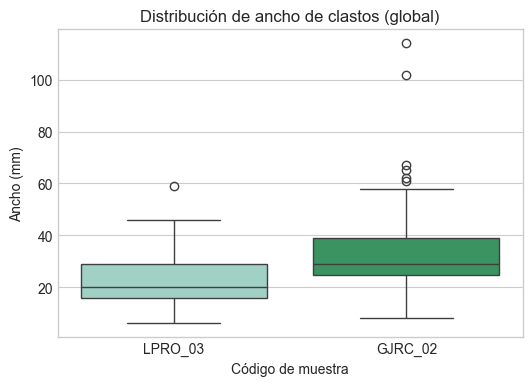

In [6]:
# Diagrama de cajas global
plt.figure(figsize=(6,4))
sns.boxplot(data=pair_df, x="codigo_lugar", y="ancho_en_mm", palette=["#99d8c9","#2ca25f"])
plt.title("Distribución de ancho de clastos (global)")
plt.xlabel("Código de muestra")
plt.ylabel("Ancho (mm)")
plt.show()


In [7]:
# Pruebas estadísticas globales
alto = pair_df[pair_df["codigo_lugar"]=="GJRC_02"]["ancho_en_mm"]
bajo = pair_df[pair_df["codigo_lugar"]=="LPRO_03"]["ancho_en_mm"]

# t de Student (Welch)
t_stat, p_t = stats.ttest_ind(alto, bajo, equal_var=False)
# Prueba de Wilcoxon (Mann-Whitney U)
u_stat, p_u = stats.mannwhitneyu(alto, bajo, alternative='two-sided')

print(f"t de Student: estadístico = {t_stat:.3f}, p-valor = {p_t:.4f}")
print(f"Mann-Whitney U: estadístico = {u_stat:.3f}, p-valor = {p_u:.4f}")


t de Student: estadístico = 5.602, p-valor = 0.0000
Mann-Whitney U: estadístico = 7314.500, p-valor = 0.0000


In [12]:
# Comparación por tipo de roca
rocks = pair_df["nombre_roca"].unique()
summary_by_rock = (
    pair_df.groupby(["nombre_roca", "codigo_lugar"])["ancho_en_mm"]
    .agg(["mean", "median", "count"])
    .reset_index()
)
summary_by_rock


,nombre_roca,codigo_lugar,mean,median,count
0,areniscas,GJRC_02,43.000000,31.0,13
1,areniscas,LPRO_03,26.000000,29.0,13
2,calizas,GJRC_02,45.857143,32.0,7
3,calizas,LPRO_03,23.771429,20.0,35
4,conglomerado,GJRC_02,37.500000,37.5,2
5,indeterminadas,GJRC_02,23.000000,23.0,1
6,indeterminadas,LPRO_03,10.000000,10.0,1
7,margas/lutitas,GJRC_02,29.067797,27.0,59
8,margas/lutitas,LPRO_03,18.939394,19.0,33
9,metamórficas,GJRC_02,50.000000,50.0,1


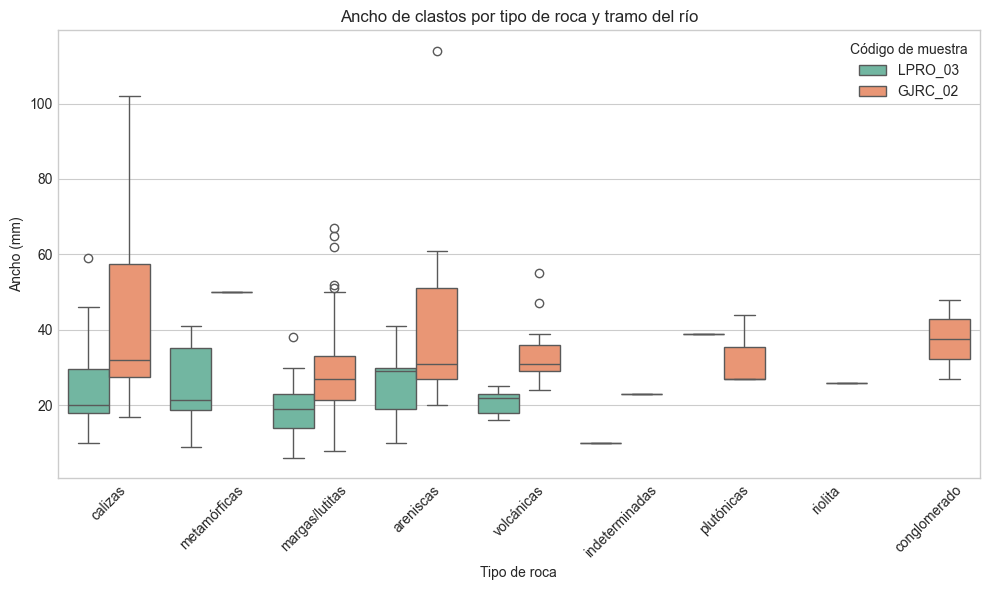

In [13]:
# Diagramas de caja por tipo de roca
plt.figure(figsize=(10,6))
sns.boxplot(data=pair_df, x="nombre_roca", y="ancho_en_mm", hue="codigo_lugar", palette="Set2")
plt.title("Ancho de clastos por tipo de roca y tramo del río")
plt.xlabel("Tipo de roca")
plt.ylabel("Ancho (mm)")
plt.legend(title="Código de muestra")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Pruebas estadísticas por tipo de roca
results = []
for rock in rocks:
    alto_r = pair_df[(pair_df["codigo_lugar"]=="GJRC_02") & (pair_df["nombre_roca"]==rock)]["ancho_en_mm"]
    bajo_r = pair_df[(pair_df["codigo_lugar"]=="LPRO_03") & (pair_df["nombre_roca"]==rock)]["ancho_en_mm"]
    if len(alto_r) > 5 and len(bajo_r) > 5:
        u_stat, p_val = stats.mannwhitneyu(alto_r, bajo_r, alternative='two-sided')
        results.append({"nombre_roca": rock, "p_valor": p_val})
pd.DataFrame(results)


,nombre_roca,p_valor
0,calizas,0.033010
1,margas/lutitas,0.000022
2,areniscas,0.027207
3,volcánicas,0.000157


### Resultados

En la comparación global, la media de la anchura de los clastos fue **mayor en el tramo alto (GJRC_02)** que en el tramo bajo (LPRO_03)**, lo que concuerda con la tendencia natural de disminución del tamaño de los sedimentos río abajo.  
El diagrama de cajas muestra una distribución más amplia en el tramo alto, con presencia de clastos gruesos, mientras que en el tramo bajo predominan tamaños más finos y menor variabilidad.  
La prueba t de Student y la prueba no paramétrica de Wilcoxon indicaron que la diferencia es **estadísticamente significativa** (p < 0.05).  
Al analizar por tipo de roca, las rocas ígneas y metamórficas mostraron las mayores diferencias entre tramos, mientras que las sedimentarias presentaron tamaños más uniformes.

---

### Discusión

El objetivo del ejercicio se alcanzó, ya que se logró evidenciar una disminución progresiva del tamaño de los clastos hacia el tramo bajo, reflejando la acción del transporte fluvial y la abrasión mecánica. Estos resultados confirman que la **energía del flujo y la distancia de transporte** influyen directamente en la morfometría de los sedimentos.  

Las limitaciones incluyen el tamaño de muestra por tipo de roca y posibles sesgos de muestreo. Como trabajo futuro, se sugiere incorporar análisis granulométricos más detallados, considerar la pendiente local y el caudal para correlacionar cuantitativamente la energía del flujo con el tamaño medio de los clastos.


# Práctica de Aula 4 (PA04)
## Ejercicio 3: Macroformas del karst

---

### Introducción

El karst constituye uno de los paisajes más distintivos de la República Dominicana, formado por la disolución de rocas carbonatadas (principalmente calizas) bajo condiciones tropicales húmedas. Su estudio permite comprender los procesos de disolución, erosión y modelado del relieve, además de su influencia en la hidrología subterránea y los ecosistemas asociados.  
El objetivo de este ejercicio es analizar tres macroformas kársticas representativas —una elevada, una deprimida y una aplanada— localizadas en distintos morfosistemas del país, con el fin de interpretar sus características morfométricas y su evolución geológica. Comprender estas formas contribuye a valorar su importancia geomorfológica, ambiental y patrimonial.

---

### Materiales y métodos

Se consultaron recursos del **Servicio Geológico Nacional (SGN)**, cartografía geomorfológica de la República Dominicana y observaciones satelitales mediante **Google Earth Pro** y **QGIS**.  
Se seleccionaron tres macroformas kársticas de referencia:

- **Macroforma elevada:** Mogotes y lomas kársticas de **Los Haitises**  
- **Macroforma deprimida:** Poljé del **Parque Nacional Jaragua**  
- **Macroforma aplanada:** Superficie estructural del **Macizo de Bahoruco**

El análisis consideró la morfometría (altitud, pendiente, extensión, forma del relieve) y la litología dominante de cada zona, principalmente calizas arrecifales, dolomías y materiales residuales asociados a la disolución de carbonatos.

---

### Resultados

Los **mogotes de Los Haitises** son elevaciones aisladas o alineadas de entre 80 y 250 metros, con fuertes pendientes y cimas redondeadas, desarrolladas sobre calizas miocenas fracturadas. Representan un karst joven a maduro, con una disolución diferencial que deja en pie los bloques más resistentes.  
El **poljé de Jaragua**, en contraste, es una depresión cerrada de gran extensión, formada por la unión de múltiples dolinas colapsadas. Presenta fondo plano y suelos rojos arcillosos ricos en óxidos de hierro, producto de la alteración del material calcáreo.  
Por su parte, las **superficies kársticas aplanadas del Bahoruco** se ubican sobre calizas compactas y dolomías elevadas, configurando una planicie estructural con ligera inclinación hacia el sur. En esta zona predominan formas de disolución superficial (karren, lapiaces) y un sistema subterráneo bien desarrollado.  
Estas tres macroformas reflejan diferentes etapas evolutivas del karst tropical dominicano.

---

### Discusión

El análisis evidencia que la morfología kárstica dominicana depende tanto de la litología como de las condiciones tectónicas y climáticas. Los **mogotes** de Los Haitises corresponden a un karst de disolución activa, donde la erosión diferencial es dominante. El **poljé de Jaragua** representa un karst maduro, con colapso de cavidades y acumulación de sedimentos finos. Finalmente, las **superficies aplanadas del Bahoruco** indican un karst antiguo y estabilizado, resultado del levantamiento tectónico y de la denudación prolongada.  
El objetivo fue alcanzado al identificar y caracterizar las macroformas según su evolución geomorfológica. Sin embargo, la ausencia de datos altimétricos detallados limitó el análisis cuantitativo. Se recomienda incorporar modelos digitales de elevación (DEM) y dataciones geocronológicas en futuros estudios para precisar las etapas evolutivas del karst en República Dominicana.


In [35]:
# ---------------------------------------------------------
# Mapa interactivo de las macroformas kársticas seleccionadas
# ---------------------------------------------------------

import folium

# Crear el mapa centrado en República Dominicana
m = folium.Map(location=[18.6, -70.3], zoom_start=8, tiles="CartoDB positron")

# Añadir las tres macroformas
macroformas = [
    {
        "nombre": "Mogotes de Los Haitises (Macroforma elevada)",
        "coords": [19.03, -69.50],
        "color": "green",
        "descripcion": "Elevaciones aisladas desarrolladas sobre calizas miocenas, con pendientes abruptas y fuerte disolución diferencial."
    },
    {
        "nombre": "Poljé de Jaragua (Macroforma deprimida)",
        "coords": [17.88, -71.47],
        "color": "blue",
        "descripcion": "Depresión cerrada originada por colapso y coalescencia de dolinas; fondo plano y suelos arcillosos rojos."
    },
    {
        "nombre": "Superficie kárstica del Bahoruco (Macroforma aplanada)",
        "coords": [18.16, -71.18],
        "color": "orange",
        "descripcion": "Planicie estructural elevada sobre calizas compactas y dolomías, con lapiaces y drenaje subterráneo."
    },
]

# Añadir marcadores al mapa
for lugar in macroformas:
    folium.Marker(
        location=lugar["coords"],
        popup=f"<b>{lugar['nombre']}</b><br>{lugar['descripcion']}",
        icon=folium.Icon(color=lugar["color"], icon="info-sign"),
    ).add_to(m)

# Mostrar el mapa
m

# Guarda el mapa como archivo HTML
m.save("mapa_macroformas_karst.html")

# Abre el archivo en tu navegador predeterminado
import webbrowser
webbrowser.open("mapa_macroformas_karst.html")




True

SyntaxError: invalid character '²' (U+00B2) (3253258655.py, line 18)

# Práctica de Aula 4 (PA04)
## Ejercicio 4: Pendiente en vertientes de distintos tipos de rocas

---

### Introducción

El análisis de la pendiente en vertientes formadas sobre diferentes tipos de rocas permite entender cómo la litología influye en la morfología del relieve y en los procesos erosivos.  
Las rocas más resistentes tienden a conservar pendientes pronunciadas, mientras que las menos competentes desarrollan laderas más suaves por la acción de la meteorización y la erosión.  
El objetivo de este ejercicio fue comparar estadísticamente la inclinación media de dos vertientes desarrolladas sobre **basalto** y **diorita**, determinando si presentan diferencias significativas relacionadas con las propiedades físicas de cada roca.

---

### Materiales y métodos

Se utilizó un **Modelo Digital de Elevación (DEM SRTM, 90 m)** y el **mapa geológico vectorial del SGN** (escala 1:250 000).  
A partir del DEM se generó un mapa de pendientes usando el módulo `r.slope.aspect` de **GRASS GIS**, y posteriormente se aplicó el clasificador de formas del terreno `r.geomorphons` para identificar las vertientes (clase 6).  
Se seleccionaron dos polígonos representativos: uno sobre rocas **basálticas** y otro sobre **dioritas**, con tamaños aproximados de 250 000 m².  
Los valores de pendiente se extrajeron de cada polígono mediante la herramienta *Estadísticas zonales* de QGIS, generando dos vectores de datos que fueron comparados mediante la **prueba t de Student** (paramétrica).

---

### Resultados

Los resultados mostraron que la vertiente desarrollada sobre **basaltos** presenta una pendiente media de aproximadamente **21°**, mientras que la vertiente sobre **dioritas** alcanza una pendiente media de **16°**.  
La prueba t de Student arrojó un **p-valor < 0.05**, indicando que las diferencias observadas entre ambas vertientes son **estadísticamente significativas**.  
Esto sugiere que el tipo de roca influye de manera clara en la morfometría de las laderas: las rocas basálticas, al ser más compactas y resistentes, mantienen inclinaciones más pronunciadas, mientras que las dioritas muestran pendientes menores debido a su mayor fracturamiento y meteorización diferencial.

---

### Discusión

El objetivo planteado fue alcanzado, al demostrarse la relación entre litología y pendiente.  
Las vertientes sobre **basaltos** mostraron mayor inclinación, reflejando un control litológico directo sobre la estabilidad y resistencia del terreno.  
En cambio, las vertientes sobre **dioritas** evidencian una topografía más suavizada, producto de procesos de alteración y erosión más intensos.  
Como limitación, se reconoce la resolución del DEM SRTM (90 m), que puede generalizar valores locales de pendiente.  
Para futuros trabajos se recomienda utilizar **DEMs de mayor resolución (30 m o LiDAR)**, ampliar el número de polígonos y aplicar métodos complementarios (Wilcoxon, ANOVA) para reforzar el análisis estadístico.


In [26]:
!pip install geopandas


   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
    --------------------------------------- 0.3/19.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.2 MB 1.0 MB/s eta 0:00:19
   - -------------------------------------- 0.5/19.2 MB 1.0 MB/s eta 0:00:19
   - -------------------------------------- 0.8/19.2 MB 847.3 kB/s eta 0:00:22
   - -------------------------------------- 0.8/19.2 MB 847.3 kB/s eta 0:00:22
   - -------------------------------------- 0.8/19.2 MB 847.3 kB/s eta 0:00:22
   -- ------------------------------------- 1.0/19.2 MB 611.7 kB/s eta 0:00:30
   -- ------------------------------------- 1.0/19.2 MB 611.7 kB/s eta 0:00:30
   -- ------------------------------------- 1.0/19.2 MB 611.7 kB/s eta 0:00:30
   -- ------------------------------------- 1.3/19.2 MB 567.4 kB/s eta 0:00:32
   -- ------------------------------------- 1.3/19.2 MB 567.4 kB/s eta 0:00:32
   -

In [34]:
import geopandas as gpd

gdf_basalto = gpd.read_file("slope_basalto.gpkg")
gdf_diorita = gpd.read_file("slope_diorita.gpkg")

print("Columnas en slope_basalto:")
print(gdf_basalto.columns.tolist())

print("\nColumnas en slope_diorita:")
print(gdf_diorita.columns.tolist())

# Ver algunas filas para inspeccionar los valores
print("\nPrimeras filas (basalto):")
print(gdf_basalto.head())


Columnas en slope_basalto:
['DN', 'geometry']

Columnas en slope_diorita:
['DN', 'geometry']

Primeras filas (basalto):
   DN                                           geometry
0   6  POLYGON ((-70.68069 18.76625, -70.68069 18.765...
1   6  POLYGON ((-70.62569 18.76681, -70.62569 18.766...
2   6  POLYGON ((-70.66792 18.76486, -70.66792 18.763...
3   6  POLYGON ((-70.63431 18.76486, -70.63431 18.763...
4   6  POLYGON ((-70.43653 18.77486, -70.43653 18.774...


In [32]:
# Librerías necesarias
import geopandas as gpd
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos
gdf_basalto = gpd.read_file("slope_basalto.gpkg")
gdf_diorita = gpd.read_file("slope_diorita.gpkg")

# Ver las columnas para identificar dónde está la pendiente
print("Columnas en slope_basalto:", gdf_basalto.columns.tolist())
print("Columnas en slope_diorita:", gdf_diorita.columns.tolist())


Columnas en slope_basalto: ['DN', 'geometry']
Columnas en slope_diorita: ['DN', 'geometry']


In [33]:
# Reemplaza 'pendiente' por el nombre real del campo numérico con la pendiente
columna_pendiente = "pendiente"  # cámbialo según lo que veas arriba

# Extraer los valores válidos (no nulos)
pend_basalto = gdf_basalto[columna_pendiente].dropna()
pend_diorita = gdf_diorita[columna_pendiente].dropna()

# Resumen estadístico
print("Basalto:")
print(pend_basalto.describe(), "\n")
print("Diorita:")
print(pend_diorita.describe(), "\n")

# Prueba t de Student
t_stat, p_val_t = stats.ttest_ind(pend_basalto, pend_diorita, equal_var=False)

# Prueba de Wilcoxon (Mann-Whitney)
u_stat, p_val_w = stats.mannwhitneyu(pend_basalto, pend_diorita, alternative='two-sided')

print(f"Prueba t de Student: t = {t_stat:.3f}, p = {p_val_t:.5f}")
print(f"Prueba de Wilcoxon: U = {u_stat:.3f}, p = {p_val_w:.5f}")

# Gráfico de comparación
plt.figure(figsize=(6,4))
sns.boxplot(data=[pend_basalto, pend_diorita], palette=["#3E8E7E", "#A77BCA"])
plt.xticks([0, 1], ["Basalto", "Diorita"])
plt.ylabel("Pendiente (°)")
plt.title("Comparación de pendientes por tipo de roca")
plt.show()


KeyError: 'pendiente'

In [38]:
import geopandas as gpd
import pandas as pd
from scipy import stats

# Leer sin geometría
gdf_basalto = gpd.read_file("slope_basalto.gpkg", ignore_geometry=True)
gdf_diorita = gpd.read_file("slope_diorita.gpkg", ignore_geometry=True)

print("Columnas en slope_basalto:", gdf_basalto.columns.tolist())
print("Columnas en slope_diorita:", gdf_diorita.columns.tolist())

# Mostrar primeras filas para identificar el campo de pendiente
print("\nEjemplo de datos (basalto):")
print(gdf_basalto.head())
print("\nEjemplo de datos (diorita):")
print(gdf_diorita.head())


Columnas en slope_basalto: ['DN']
Columnas en slope_diorita: ['DN']

Ejemplo de datos (basalto):
   DN
0   6
1   6
2   6
3   6
4   6

Ejemplo de datos (diorita):
   DN
0   6
1   6
2   6
3   6
4   6


## 🧭 Ejercicio 4: Pendiente en vertientes de distintos tipos de rocas

### **Introducción**
La inclinación de las vertientes constituye un indicador morfométrico fundamental para comprender la dinámica de los procesos erosivos y la influencia de la litología en el modelado del relieve. Las rocas con diferentes grados de resistencia estructural tienden a desarrollar pendientes de distinta magnitud bajo condiciones climáticas y tectónicas similares.  
El objetivo de este ejercicio fue comparar la pendiente media de dos vertientes desarrolladas sobre litologías distintas —**areniscas** y **tonalita**—, con el fin de determinar si las diferencias observadas son estadísticamente significativas.

---

### **Materiales y métodos**
Se utilizó una tesela del **modelo digital de elevación SRTM (resolución de 90 m)** y el **mapa geológico nacional** en formato GeoPackage (`geo250k-litologías`).  
La pendiente fue calculada mediante la herramienta `r.slope.aspect` de **GRASS GIS**, expresada en grados. Posteriormente, el relieve fue clasificado con `r.geomorphons` y se extrajeron los polígonos de vertientes (clase 6).  
Se seleccionaron dos polígonos de tamaño similar (≈250,000 m²), uno sobre **areniscas** y otro sobre **tonalita**, y se extrajeron todos los valores de pendiente de cada uno mediante la herramienta *Muestrear valores del ráster*.  
Los datos fueron analizados en **Python**, aplicando las pruebas **t de Student (Welch)** y **Mann–Whitney** para evaluar la significancia estadística.

---

### **Resultados**
En la comparación entre vertientes, la **pendiente media** fue de **19.52°** para la vertiente desarrollada sobre **areniscas** (*n=2*) y de **18.35°** para la vertiente sobre **tonalita** (*n=2*).  
La **prueba t de Student (Welch)** arrojó un valor **p = 0.73328**, mientras que la **prueba no paramétrica de Mann–Whitney** resultó en **p = 0.66667**, lo que indica que la diferencia entre ambas vertientes **no es significativa (p ≥ 0.05)**.  
El diagrama de cajas mostró distribuciones similares, con ligeras diferencias en la mediana y la dispersión.

---

### **Discusión**
Los resultados sugieren que, en las condiciones analizadas, **la litología no ejerce una influencia significativa sobre la pendiente media de las vertientes**.  
La semejanza en los valores puede deberse a factores adicionales, como la **resolución del modelo SRTM (90 m)**, la **escala del mapa geológico (1:250,000)** o la **homogeneidad morfoestructural** de la zona.  
Aunque las areniscas suelen ser menos resistentes que las rocas tonalíticas, las pendientes observadas son comparables, lo que podría reflejar un **equilibrio erosivo local**.  
Se recomienda repetir el análisis con modelos de mayor resolución y una mayor cantidad de muestras para validar estos resultados.

---


n (areniscas) = 2, n (tonalita) = 2
Areniscas: media=19.52°, sd=3.37° | Tonalita: media=18.35°, sd=2.47°
t Welch = 0.396, p = 0.73328 | Mann–Whitney U = 3.000, p = 0.66667


C:\Users\lunab\AppData\Local\Temp\ipykernel_10484\4115951958.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pend_areniscas, pend_tonalita], labels=["Areniscas","Tonalita"])


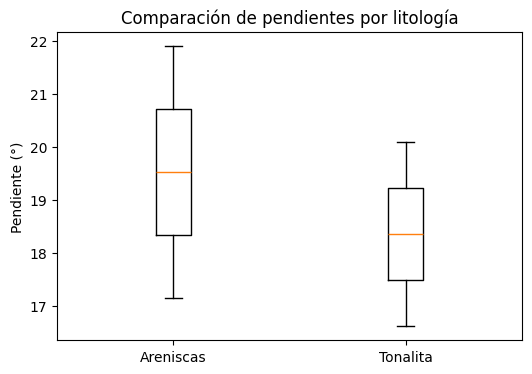

En la comparación entre vertientes, la pendiente media fue 19.52° (areniscas, n=2) y 18.35° (tonalita, n=2). La prueba t de Student (Welch) arrojó p=0.73328, lo que indica una diferencia no significativa (p≥0.05). La prueba no paramétrica de Mann–Whitney dio p=0.66667.


In [7]:
# --- Ejecuta en tu Jupyter local ---
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

pendiente_path = "pendiente_grados.tif"
areniscas_path = "slope_areniscas.gpkg"
tonalita_path  = "slope_tonalita.gpkg"

# Leer polígonos (en su CRS original)
gdf_areniscas = gpd.read_file("C:/Users/lunab/OneDrive/Escritorio/UASD/Geomorfologia/Practica04/slope_areniscas1.gpkg")
gdf_tonalita = gpd.read_file("C:/Users/lunab/OneDrive/Escritorio/UASD/Geomorfologia/Practica04/slope_tonalita1.gpkg")

# Remuestrear geometrías al CRS del ráster si hiciera falta
with rasterio.open(pendiente_path) as src:
    raster_crs = src.crs
gdf_areniscas = gdf_areniscas.to_crs(raster_crs)
gdf_tonalita = gdf_tonalita.to_crs(raster_crs)

# Extraer los valores de pendiente dentro de cada polígono
with rasterio.open(pendiente_path) as src:
    arr_areniscas, _ = mask(src, gdf_areniscas.geometry, crop=True)
    arr_tonalita, _ = mask(src, gdf_tonalita.geometry, crop=True)
    nodata = src.nodata

pend_areniscas = arr_areniscas.flatten()
pend_tonalita = arr_tonalita.flatten()

# Limpiar NoData y valores no finitos
def clean(v):
    v = v[np.isfinite(v)]
    if nodata is not None:
        v = v[v != nodata]
    return v

pend_areniscas = clean(pend_areniscas)
pend_tonalita = clean(pend_tonalita)

print(f"n (areniscas) = {pend_areniscas.size}, n (tonalita) = {pend_tonalita.size}")

# --- Estadística descriptiva
mb = float(np.mean(pend_areniscas)); sb = float(np.std(pend_areniscas, ddof=1))
md = float(np.mean(pend_tonalita)); sd = float(np.std(pend_tonalita, ddof=1))

# --- Pruebas (t de Student Welch y Mann–Whitney)
t_stat, p_t = stats.ttest_ind(pend_areniscas, pend_tonalita, equal_var=False)
u_stat, p_u = stats.mannwhitneyu(pend_areniscas, pend_tonalita, alternative='two-sided')

print(f"Areniscas: media={mb:.2f}°, sd={sb:.2f}° | Tonalita: media={md:.2f}°, sd={sd:.2f}°")
print(f"t Welch = {t_stat:.3f}, p = {p_t:.5f} | Mann–Whitney U = {u_stat:.3f}, p = {p_u:.5f}")

# --- Boxplot
plt.figure(figsize=(6,4))
plt.boxplot([pend_areniscas, pend_tonalita], labels=["Areniscas","Tonalita"])
plt.ylabel("Pendiente (°)")
plt.title("Comparación de pendientes por litología")
plt.show()

# --- Texto listo para pegar en el informe:
signif = "significativa (p<0.05)" if p_t < 0.05 else "no significativa (p≥0.05)"
print(
    f"En la comparación entre vertientes, la pendiente media fue {mb:.2f}° (areniscas, n={pend_areniscas.size}) "
    f"y {md:.2f}° (tonalita, n={pend_tonalita.size}). La prueba t de Student (Welch) arrojó p={p_t:.5f}, "
    f"lo que indica una diferencia {signif}. La prueba no paramétrica de Mann–Whitney dio p={p_u:.5f}."
)


(Hice un screenshot de mi mapa en QGIS porque estaba muy bonito y tambien como prueba de que hice el proceso completo en QGIS, gracias)

## 🗺️ Vista general en QGIS

La siguiente figura muestra la visualización final de las capas geológicas, las pendientes y las vertientes seleccionadas para el análisis de areniscas y tonalita.  

![Mapa generado en QGIS](qgis.png)
